<a href="https://colab.research.google.com/github/mhtarora39/Tensorflow-Stuff/blob/master/Analytic_Vidhya_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

In [2]:
!pip install tensorflow-gpu==2.0.0-beta1

In [0]:
import seaborn as sb

In [4]:
#rawData = pd.read_csv("./train_F3WbcTw.csv")
from google.colab import files
uploaded = files.upload()

Saving test_tOlRoBf.csv to test_tOlRoBf.csv


In [5]:
rawData = pd.read_csv("train_F3WbcTw.csv")
rawData.shape

(5279, 4)

In [8]:
import tensorflow as tf
print("GPU Available: ", tf.test.is_gpu_available())

GPU Available:  True


In [9]:
rawData.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1


In [0]:
sentiDrug0  = rawData[rawData["sentiment"]==0]["text"]
sentiDrug1  = rawData[rawData["sentiment"]==1]["text"]
sentiDrug2  = rawData[rawData["sentiment"]==2]["text"]

In [11]:
len(sentiDrug0),len(sentiDrug1),len(sentiDrug2)

(617, 837, 3825)

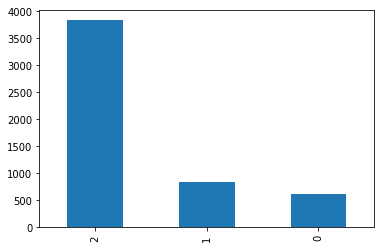

In [12]:
rawData["sentiment"].value_counts().plot(kind="bar")

In [0]:
drugSorted = (rawData.drug.value_counts())#.plot(kind="bar",figsize = (16,6))

In [14]:
topDrugs = drugSorted[drugSorted > 200]
topDrug = rawData.isin(dict(topDrugs).keys())
topDrug =  rawData[topDrug.drug]
topDrug.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1


In [0]:
df_0 = topDrug[topDrug.sentiment == 0]
df_1 = topDrug[topDrug.sentiment == 1]
df_2 = topDrug[topDrug.sentiment == 2]
##To keep the order of the data
tickerList = []
for item in dict((topDrug.drug).value_counts()):
     tickerList.append(item)

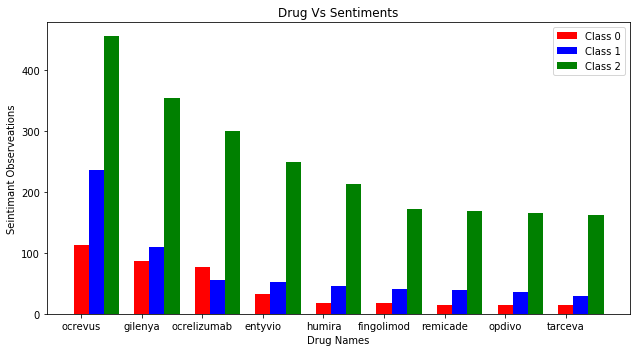

In [16]:
classes    = 9
numericCat = np.arange(classes)
xTickerA    = list(df_0.drug.unique())
xValuesA    = list(df_0.drug.value_counts())
xTickerB    = list(df_1.drug.unique())
xValuesB    = list(df_1.drug.value_counts())
xTickerC    = list(topDrug.drug.unique())
xValuesC    = list(df_2.drug.value_counts())

barWidth   = 0.25

fig, axis  = plt.subplots()
plt.bar(numericCat,xValuesA,color = "r",width=barWidth,label = "Class 0")
plt.xticks(numericCat,tickerList)
plt.bar(numericCat+barWidth,xValuesB,barWidth,color = "b",label = "Class 1")
plt.bar(numericCat+2*barWidth,xValuesC,barWidth,color = "g",label = "Class 2")
plt.xlabel('Drug Names')
plt.ylabel("Seintimant Observeations")
#plt.xlabel("Person')
#plt.ylabel('Scores')
fig.set_size_inches(9,5, forward=True)
plt.title("Drug Vs Sentiments")
plt.legend()
plt.tight_layout()
plt.show()


In [17]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
en_stops = list((stopwords.words('english')))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
rawData["textLower"] = rawData["text"].str.lower()
rawData["textLower"]  = rawData["textLower"].str.replace('[^\w\s]','')

In [0]:
rawData["textLowerClean"] = rawData["textLower"].apply(
lambda item : ' '.join(x for x in item.split() if x not in en_stops )
)



In [0]:
import tensorflow as tf

In [0]:
################Tokenizer step#####################

# Tokenizer step of keras assine token in sorted way 
# Lesser the number more frequent token is 

tokenize = tf.keras.preprocessing.text.Tokenizer()

In [0]:
#estimating words and index
maxword = 0
index   = 0
maxIndex =0
for item in list(rawData["textLowerClean"]):
    if(len(item.split()) > maxword):
        maxword = len(item.split())
        maxIndex = index
    index += 1    

In [23]:

len(rawData['textLowerClean'][1657].split())

12902

In [0]:
tokenize.fit_on_texts(list(rawData["textLowerClean"]))

In [0]:
tokenize.word_index
tokenize.word_index["<END>"] = -1

In [26]:
tokenize.word_index["<END>"]

-1

In [0]:
numericSequence = tokenize.texts_to_sequences((list(rawData["textLowerClean"])))

In [0]:
numericSequencePadded =tf.keras.preprocessing.sequence.pad_sequences(numericSequence,maxlen=3500)

In [0]:
'''
ninjaHuthori = []
for item in numericSequence:
    ninjaHuthori.append(len(item))
plt.hist(ninjaHuthori,bins=int(len(ninjaHuthori)/50))
'''


'\nninjaHuthori = []\nfor item in numericSequence:\n    ninjaHuthori.append(len(item))\nplt.hist(ninjaHuthori,bins=int(len(ninjaHuthori)/50))\n'

In [0]:

#determining hidden layer size
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

<h2>Performing PCA using Scikit-Learn is a two-step process</h2>
<br>
<p>
Initialize the PCA class by passing the number of components to the constructor.
Call the fit and then transform methods by passing the feature set to these methods. The transform method returns the specified number of principal components.
Take a look at the following code:
    </p>
<a href = "https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/"  target="_blank">PCA Link</a>

In [0]:
sc = StandardScaler()
stdNumericSequencePadded = sc.fit_transform(numericSequencePadded)

In [0]:
pca = PCA()
transform = pca.fit_transform(stdNumericSequencePadded )
ratio  = pca.explained_variance_ratio_
arr   = []
total = 0
for rat in ratio:
    total += rat
    arr.append(total)
    if(total>=0.99):
        break

#estimating nuber of hidden layers        

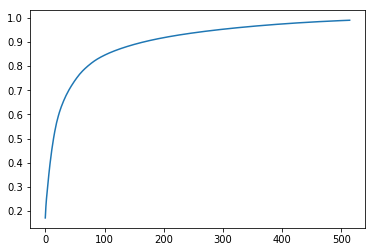

In [0]:
plt.plot(arr)

In [0]:
len(arr)

515

<h3>How word2vec works:</h3>

<h4>The idea behind word2vec is that:</h4>
<br>
<l>
    <li>
        Take a 3 layer neural network. (1 input layer + 1 hidden layer + 1 output layer)</li>
    <li>Feed it a word and train it to predict its neighbouring word.</li>
    <li>Remove the last (output layer) and keep the input and hidden layer.</li>
     <li>Now, input a word from within the vocabulary. The output given at the hidden layer is the ‘word embedding’ of the             input word.</li>
</l>    
<br>
<a href = "https://towardsdatascience.com/learn-word2vec-by-implementing-it-in-tensorflow-45641adaf2ac" >Word2vac</a>
<br>

In [0]:
#getting input vectors
ignore = -1
train  =[]
target =[]


def makePair(index,line):
    train  = []
    target = []
    size   = len(line)
    train.append(line[index])
    if(index > 1 and index < size-2):  
        target.append(line[index -1])
        target.append(line[index -2])
        target.append(line[index +1])
        target.append(line[index +2])
    else:
        if(size < 4):
            for i in range(4):
                if(i>size-1):
                    line.append(-1)   
        target.append(-1)
        
        if(index < 2 ):
            target.append(line[index +1])
            target.append(line[index +2])
        
            if(index == 0):
                target.append(-1)
            else:
                target.append(line[index -1])
        
        else:
            target.append(line[index -1])
            target.append(line[index -2])
            
            if(index ==  size - 1):
                target.append(-1)
            else:
                target.append(line[index +1])
                
    return [train,target]

def PairForTraining(linesArray):
    trainTarget = []
    
    for line in linesArray:
        #line = line.split()
        size = len(line)
        for index in np.arange(size):
            trainTarget.append(makePair(index,line))
            
    return (trainTarget)    



wordToVacData = PairForTraining(numericSequence)
        
        
        
            
                
            
            

In [30]:
wordToVacData[0][0]

[960]

In [0]:
##Test the wordembeddings`````````````````````````````
#tokenize.index_word[wordToVacData[0][0][0]],tokenize.index_word[wordToVacData[0][1][1]],tokenize.index_word[wordToVacData[0][1][2]]

In [0]:
label = rawData["sentiment"]

In [33]:
#encoding symbels from keras
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
encoder.fit(label)
label = encoder.transform(label)
label

array([2, 2, 2, ..., 2, 2, 0])

In [0]:
label = tf.keras.utils.to_categorical(y=label,num_classes=3)

In [35]:
label

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [0]:
from sklearn.model_selection import train_test_split
trainPadded,testPadded,trainOut,testOut = train_test_split(numericSequencePadded,label,test_size = 0.1,random_state=42)

In [0]:
#input 1 number output is 4 number 
#
model =tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_length= 3500,
                              input_dim   = len(tokenize.index_word)+1,
                              output_dim  = 1000
                             ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3,activation = tf.nn.softmax)]
)


In [38]:
len(numericSequencePadded),len(label)

(5279, 5279)

In [0]:
#compilation
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 3500, 1000)        50234000  
_________________________________________________________________
flatten (Flatten)            (None, 3500000)           0         
_________________________________________________________________
dense (Dense)                (None, 3)                 10500003  
Total params: 60,734,003
Trainable params: 60,734,003
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.fit(x = np.array(trainPadded),y = np.array(trainOut),epochs=5)

W0728 13:24:27.234838 140105195485056 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 4751 samples
Epoch 1/5
4751/4751 [==============================] - 100s 21ms/sample - loss: 4.3703 - accuracy: 0.7266
Epoch 2/5
4751/4751 [==============================] - 98s 21ms/sample - loss: 4.4002 - accuracy: 0.7270
Epoch 3/5
4751/4751 [==============================] - 97s 20ms/sample - loss: 4.4002 - accuracy: 0.7270
Epoch 4/5
4751/4751 [==============================] - 97s 20ms/sample - loss: 4.4002 - accuracy: 0.7270
Epoch 5/5
4751/4751 [==============================] - 98s 21ms/sample - loss: 4.4002 - accuracy: 0.7270
